# **Bank Customer Churn**

The dataset for this notebook can be found on [Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers).

### *But... what does **churn** mean?*

The *churn rate* refers to the proportion of customers or subscribers that left the customer base of a supplier, in a given period of time. It may indicate that the clients are not satisfied with the service or that there are better offers from the competitors of the business. It is usually an important metric for subscriber-based service models.
<br/>
<br/>
For this case, specifically, it is a measure of the number of people that left the customer base of the bank. [[Wikipedia]](https://github.com/iCoelho24/Telco-Churn/blob/main/C%C3%B3digo/Telco.ipynb)


### *So... what do we want to do?*

Based on the exploration of the information that we have available, we will:
1. identify the factors thar contribute to customer churn;
2. try to create a model that predicts the clients that are more likely to leave the bank in the future, so that the bank gets a chance to act before losing its customers.

### *And what **data** do we have available?*

These are **14** columns  available, the last one being the target:
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Ok, so first we import our data:

In [70]:
df_bank_churn = pd.read_csv('churn.csv')
display(df_bank_churn.head())
print(f'Our table has {df_bank_churn.shape[1]} columns and {df_bank_churn.shape[0]} records.')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Our table has 14 columns and 10000 records.


In [71]:
df_bank_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [72]:
df_bank_churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [73]:
df_bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Highlights**
- we have no missing values;
- there are 3 datatypes: float, integer and object;

**Actions**
- Based on the description of the variables and the analysis above, we decide to **discard the 3 first columns**. They are all related to a specific customer and will not contribute to our analysis or our model.

In [74]:
df_bank_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_bank_churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Highlights**
- the minimum credit score for the clients in the dataset is 350, and the maximum 850;
- the customers age range from 18 to 92 years old;
- the oldest customers have beenwith the bank for 10 years;
- All clients have at least 1 product, and the max number of products is 4;
- Most clients have a credit card;
- Around 20% of clients left the bank in the given period.

# **Exploratory Data Analysis**

In [75]:
df_bank_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Variáveis Categóricas


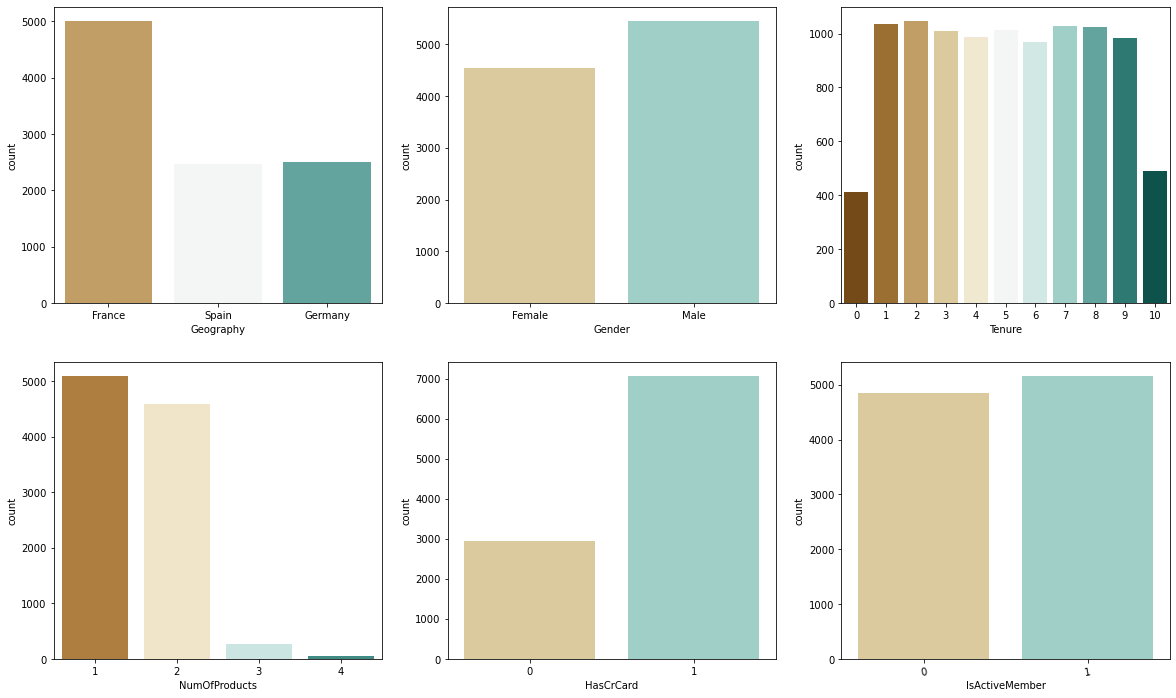

In [76]:
fig, ax = plt.subplots(2, 3, figsize=(20,12))

sns.countplot(data=df_bank_churn, x='Geography', palette = 'BrBG', ax=ax[0,0])
sns.countplot(data=df_bank_churn, x='Gender', palette = 'BrBG', ax=ax[0,1])
sns.countplot(data=df_bank_churn, x='Tenure', palette = 'BrBG', ax=ax[0,2])
sns.countplot(data=df_bank_churn, x='NumOfProducts', palette = 'BrBG', ax=ax[1,0])
sns.countplot(data=df_bank_churn, x='HasCrCard', palette = 'BrBG', ax=ax[1,1])
sns.countplot(data=df_bank_churn, x='IsActiveMember', palette = 'BrBG', ax=ax[1,2])

plt.xticks(rotation=10)
print('Variáveis Categóricas')


In [60]:
df_bank_churn.Gender = df_bank_churn.Gender.apply(lambda x: 1 if x == 'Male' else 0)
df_bank_churn.head()

[Text(0, 0, '7963'), Text(0, 0, '2037')]

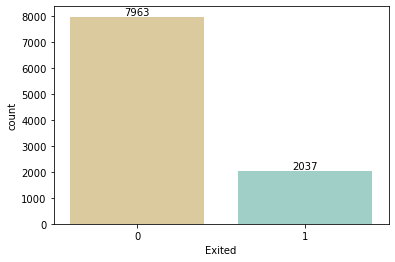

In [33]:
ax = sns.countplot(data=df_bank_churn, x='Exited', palette = 'BrBG')
ax.bar_label(ax.containers[0])